In [1]:
import pyworld2
from pyworld2 import World2, utils
import numpy as np
import matplotlib.pyplot as plt
import json
p_vals = np.zeros(3)
p_effects = np.zeros((6, 3))
s_time, m_time, e_time = 0, 0, 0

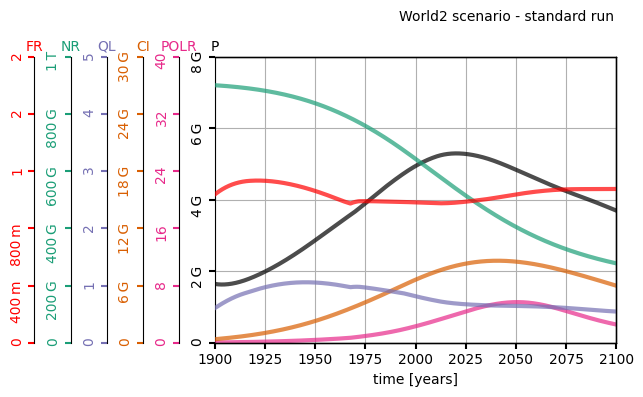

In [2]:
with open('functions_switch_default.json', 'r') as file:
    data = json.load(file)

# Loop through the list and find the dictionary where "trigger.name" is "SWT2"
for item in data:
    if item.get("trigger.name") == "SWT2":# Add/update the key-value pair
        p_vals[1] = item["NRUN1"]
w2 = World2()
w2.set_state_variables()
w2.set_initial_state()
w2.set_table_functions()
w2.set_switch_functions("./functions_switch_default.json")
w2.run()
for i, j in enumerate(w2.time):
    if np.isclose(j, 2000.0, atol=0.1):  # Allow small tolerance
        s_time = i
    if np.isclose(j, 2050.0, atol=0.1):
        m_time = i
    if np.isclose(j, 2100.0, atol=0.1):
        e_time = i

title_std = "World2 scenario - standard run"
utils.plot_world_variables(w2.time,
                         [w2.p, w2.polr, w2.ci, w2.ql,
                          w2.nr, w2.fr],
                          ["P", "POLR", "CI", "QL", "NR", "FR"],
                          [[0, 8e9], [0, 40], [0, 30e9], [0, 5], [0, 1000e9], [0, 2]],
                          figsize=(7, 4), grid=True,
                          title=title_std)
p_effects[0, 1] = w2.p[s_time]
p_effects[1, 1] = w2.polr[s_time]
p_effects[2, 1] = w2.ci[s_time]
p_effects[3, 1] = w2.ql[s_time]
p_effects[4, 1] = w2.nr[s_time]
p_effects[5, 1] = w2.fr[s_time]

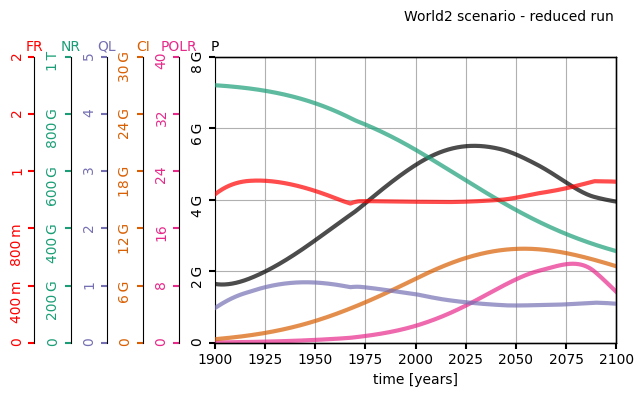

In [3]:
with open('functions_switch_default.json', 'r') as file:
    data = json.load(file)

# Loop through the list and find the dictionary where "trigger.name" is "SWT2"
for item in data:
    if item.get("trigger.name") == "SWT2":
        item["NRUN1"] = item["NRUN1"] - 0.25 * item["NRUN1"]  # Add/update the key-value pair
        p_vals[0] = item["NRUN1"]
# Write the updated data to a new file
with open('functions_switch_modified.json', 'w') as file:
    json.dump(data, file, indent=4)  # Indent for better readability
w2 = World2()
w2.set_state_variables()
w2.set_initial_state()
w2.set_table_functions()
w2.set_switch_functions("./functions_switch_modified.json")
w2.run()
title_std = "World2 scenario - reduced run"
utils.plot_world_variables(w2.time,
                         [w2.p, w2.polr, w2.ci, w2.ql,
                          w2.nr, w2.fr],
                          ["P", "POLR", "CI", "QL", "NR", "FR"],
                          [[0, 8e9], [0, 40], [0, 30e9], [0, 5], [0, 1000e9], [0, 2]],
                          figsize=(7, 4), grid=True,
                          title=title_std)

p_effects[0, 0] = w2.p[s_time]
p_effects[1, 0] = w2.polr[s_time]
p_effects[2, 0] = w2.ci[s_time]
p_effects[3, 0] = w2.ql[s_time]
p_effects[4, 0] = w2.nr[s_time]
p_effects[5, 0] = w2.fr[s_time]


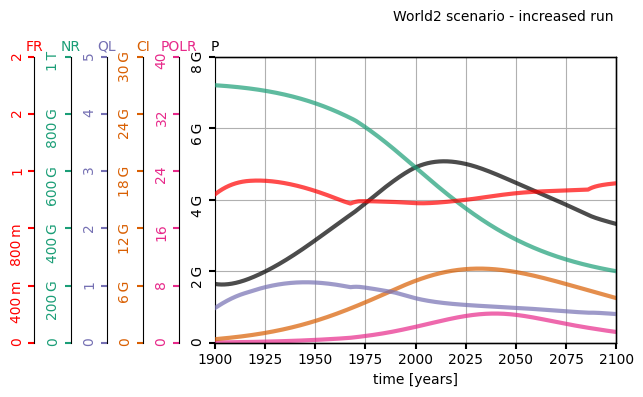

In [4]:
with open('functions_switch_default.json', 'r') as file:
    data = json.load(file)

# Loop through the list and find the dictionary where "trigger.name" is "SWT2"
for item in data:
    if item.get("trigger.name") == "SWT2":
        item["NRUN1"] = item["NRUN1"] + 0.25 * item["NRUN1"]  # Add/update the key-value pair
        p_vals[2] = item["NRUN1"]
# Write the updated data to a new file
with open('functions_switch_modified.json', 'w') as file:
    json.dump(data, file, indent=4)  # Indent for better readability
w2 = World2()
w2.set_state_variables()
w2.set_initial_state()
w2.set_table_functions()
w2.set_switch_functions("./functions_switch_modified.json")
w2.run()
title_std = "World2 scenario - increased run"
utils.plot_world_variables(w2.time,
                         [w2.p, w2.polr, w2.ci, w2.ql,
                          w2.nr, w2.fr],
                          ["P", "POLR", "CI", "QL", "NR", "FR"],
                          [[0, 8e9], [0, 40], [0, 30e9], [0, 5], [0, 1000e9], [0, 2]],
                          figsize=(7, 4), grid=True,
                          title=title_std)

p_effects[0, 2] = w2.p[s_time]
p_effects[1, 2] = w2.polr[s_time]
p_effects[2, 2] = w2.ci[s_time]
p_effects[3, 2] = w2.ql[s_time]
p_effects[4, 2] = w2.nr[s_time]
p_effects[5, 2] = w2.fr[s_time]

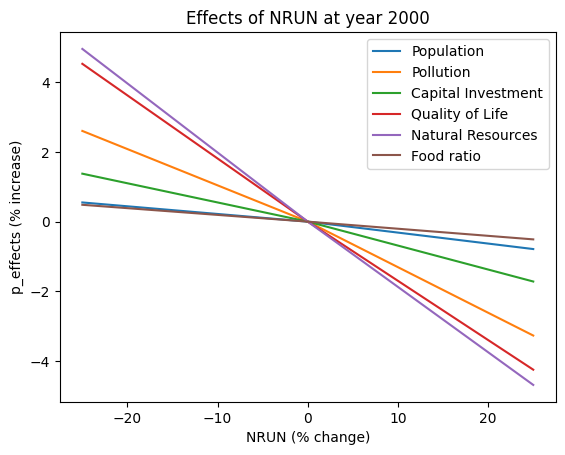

In [5]:
for i in range(6):
    den = p_effects[i, 1]
    for j in range(3):
        p_effects[i, j] = (p_effects[i, j] - den) * 100 / den
den1 = p_vals[1]

for i in range(3):
    p_vals[i] = (p_vals[i] - den1) * 100 / den1
labels = ['Population', 'Pollution', 'Capital Investment', 'Quality of Life', 'Natural Resources', 'Food ratio']

plt.title('Effects of NRUN at year 2000')
for i in range(p_effects.shape[0]):
    label = labels[i]
    plt.plot(p_vals, p_effects[i, :], label=label)
plt.xlabel('NRUN (% change)')
plt.ylabel('p_effects (% increase)')
plt.legend()
plt.show()